In [8]:
from calendar import monthrange

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import legend

In [9]:
sale_data = pd.read_csv('/Users/javonteanthony/Downloads/sales_data.csv')

In [10]:
sale_data_df = pd.DataFrame(sale_data)

In [11]:
sale_data_df

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David


In [12]:
sale_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [13]:
sale_data_df['Sale_Date'] = pd.to_datetime(sale_data_df['Sale_Date'])


In [14]:
cat = sale_data_df.groupby(['Sale_Date'])['Sales_Amount'].sum().reset_index()

In [15]:
monthly_sales = cat.resample('M', on='Sale_Date').sum()

/var/folders/4h/hd8wqf6s7ys8pgxvt86pq0lr0000gn/T/ipykernel_13728/1474931499.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = cat.resample('M', on='Sale_Date').sum()


In [16]:
cat

,Sale_Date,Sales_Amount
0,2023-01-01,14141.12
1,2023-01-02,6452.79
2,2023-01-03,21319.08
3,2023-01-04,30175.06
4,2023-01-05,16708.75
...,...,...
335,2023-12-28,7976.44
336,2023-12-29,20842.53
337,2023-12-30,26107.95
338,2023-12-31,28608.37


In [17]:
sale_data_df = sale_data_df.dropna(subset=['Sales_Amount', 'Sale_Date', 'Product_Category'])


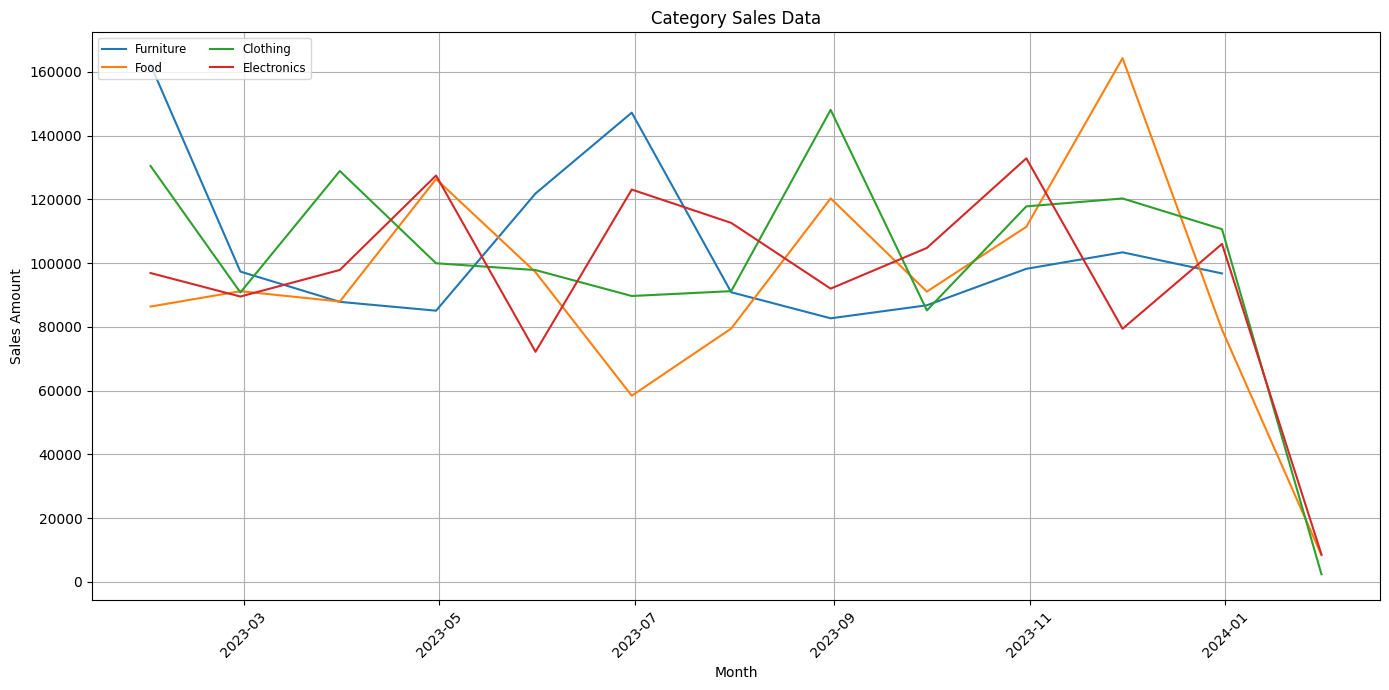

In [18]:
plt.figure(figsize=(14, 7))
for category in sale_data_df['Product_Category'].unique():
    category_df = sale_data_df[sale_data_df['Product_Category'] == category]
    monthly_sales = category_df.resample('ME', on='Sale_Date')['Sales_Amount'].sum()
    plt.plot(monthly_sales.index, monthly_sales.values, label=category)

plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.xticks(rotation=45)
plt.title("Category Sales Data")
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.tight_layout()
plt.grid(True)